# 문제정의

* single variable linear regression 문제
* y = ax + b 형태의 하나의 변수를 가진 선형 데이터에서 a, b를 추론해 봅니다.

<!-- TEASER_END -->

# 개발환경

* python 3.x, tensorflow 1.0

# 데이터 준비

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

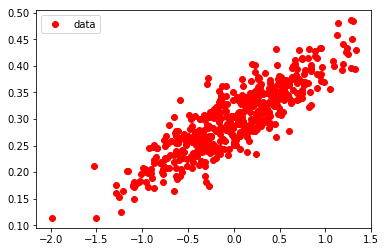

In [5]:
# 트레이닝을 위해서 y = 0.1 * x + 0.3 의 직선에 근사하도록 
# 랜덤 데이터를 생성하고 잘 생성되었는지 plotting 해서 확인해봅니다.

num_points = 500
x_data = []
y_data = []
for i in range(num_points):
    x = np.random.normal(0.0, 0.55)
    y = x * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    x_data.append(x)
    y_data.append(y)

plt.plot(x_data, y_data, 'ro', label='data')
plt.legend()
plt.show()

# 알고리즘 선택

* 선형 방정식의 weight, bias 를 추론하는 문제
* Tensorflow를 이용하여 Linear Regression 방식으로 문제를 풀어 봅니다.

In [6]:
import tensorflow as tf

In [7]:
# 알아내기 위한 Weight 와 bias 를 랜덤 값으로 초기화하고 선형 방정식을 정의합니다.
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.random_uniform([1], 0.0, 1.0))
y = W * x_data + b

In [8]:
# 예측한 값과 실제 값의 차이의 제곱 값의 평균을 loss 함수로 정의합니다.
# loss 함수를 이렇게 정의하는 이유는 미분 후 Convex한 형태의 함수가 되도록 하여
# Gradient Descent Optimizer 방법을 이용해 최적점을 찾아가기 위함입니다. 
loss = tf.reduce_mean(tf.square(y - y_data))

# 큰 보통은 0.001 정도의 learning rate를 사용하지만,
# 여기서는 몇번 학습을 반복해보고 정확도에 영향없이 범위에서 빠른 학습을 위해 큰 값을 사용했습니다. 
optimizer = tf.train.GradientDescentOptimizer(0.7)
train = optimizer.minimize(loss)

step: 0, loss: 0.080699


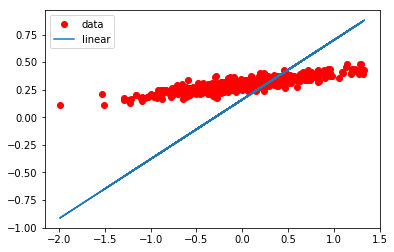

step: 1, loss: 0.022958


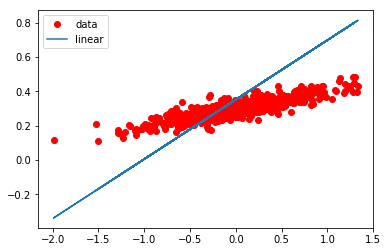

step: 2, loss: 0.007384


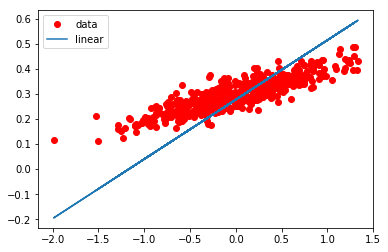

step: 3, loss: 0.002928


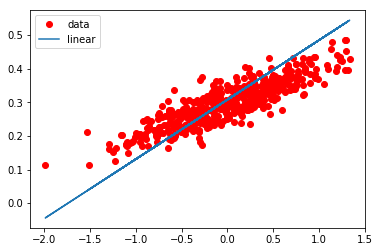

step: 4, loss: 0.001606


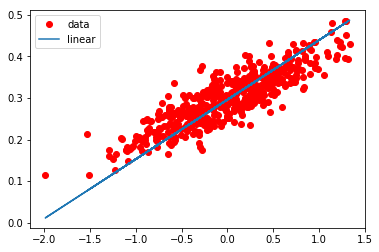

step: 5, loss: 0.001205


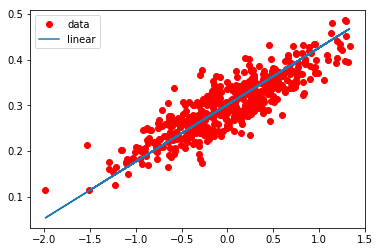

step: 6, loss: 0.001082


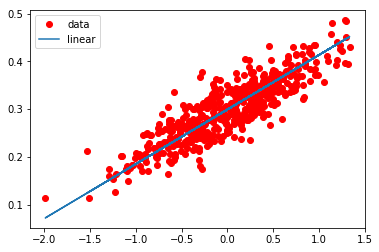

step: 7, loss: 0.001045


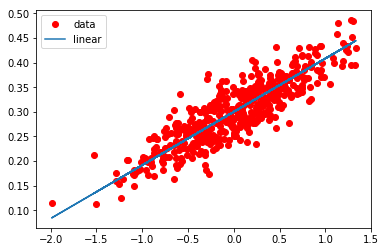

step: 8, loss: 0.001033


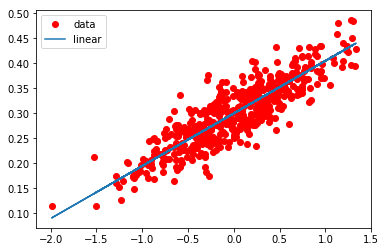

step: 9, loss: 0.001029


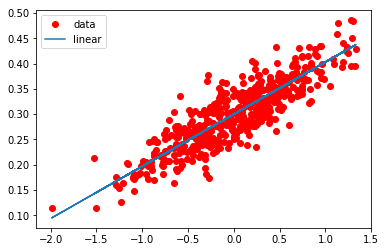

In [12]:
# tensorflow 의 session을 열고, 
# 위에서 정의한 loss 함수를 최소화 시키는 W, b 값을 찾기위해 정의한 
# 그래프 train 을 run 함수를 통해 수행 시킵니다.
# 중간, 중간 W, b 값의 변화를 시각 적으로 보기위해 그래프 상에 표시해봅니다.
final_W = 0
final_b = 0
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    for step in range(10):
        sess.run(train)
        final_W = sess.run(W)
        final_b = sess.run(b)
        print("step: %d, loss: %f" % (step, sess.run(loss)))
        plt.plot(x_data, y_data, 'ro', label='data')
        plt.plot(x_data, sess.run(W) * x_data + sess.run(b), label='linear')
        plt.legend()
        plt.show()

# 실험 평가

* 훈련이 끝난 후 weight, bias가 실제 데이터 생성시 사용했던 것과 유사한지 측정해 봅니다. 

final_W: 0.103232, final_b: 0.299874


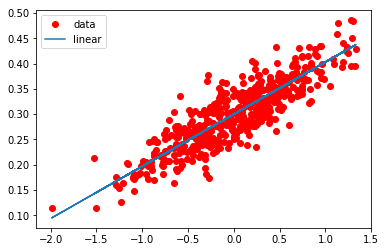

In [13]:
# 데이터 생성시 W = 1, b = 0.3 을 사용했었는데, 
# 해당 값과 근접하게 훈련된 것을 확인할 수 있습니다.
print("final_W: %f, final_b: %f" % (final_W, final_b))

plt.plot(x_data, y_data, 'ro', label='data')
plt.plot(x_data, final_W * x_data + final_b, label='linear')
plt.legend()
plt.show()